# LSTM Example

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

sns.set(rc={'figure.figsize':(15,8)})

## Data preprocessing

In [2]:
data = pd.read_csv('AirPassengers.csv',parse_dates=['Month'])

In [3]:
data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
data.shape

(144, 2)

In [5]:
data['Month'].min()

Timestamp('1949-01-01 00:00:00')

In [6]:
data['Month'].max()

Timestamp('1960-12-01 00:00:00')

## EDA

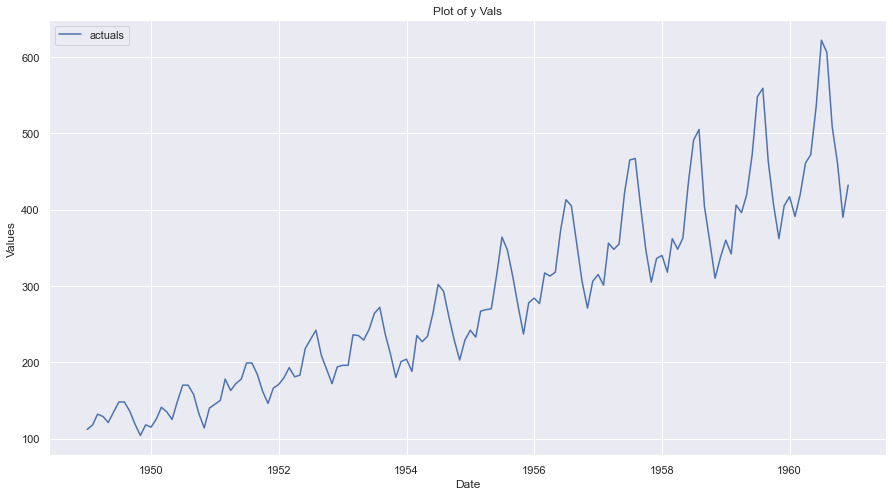

In [7]:
f = Forecaster(y=data['#Passengers'],current_dates=data['Month'])
f.plot()

In [8]:
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    ForecastLength=0
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
)

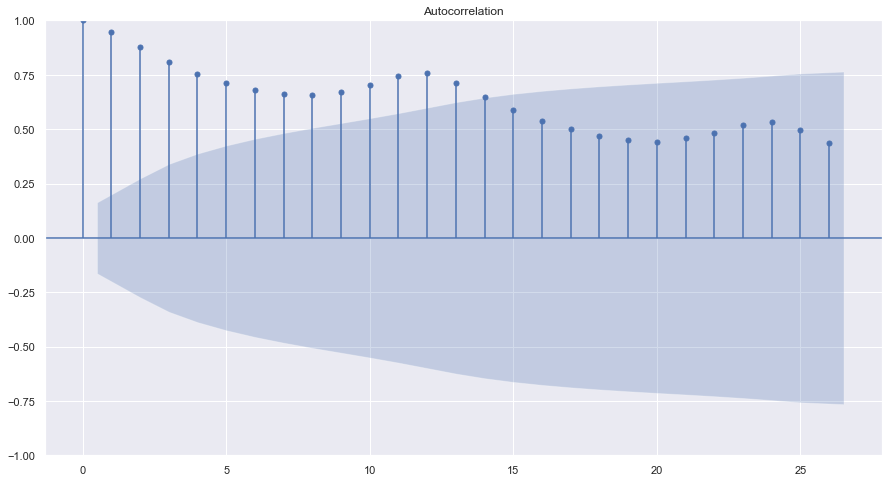

In [9]:
f.plot_acf(lags=26)
plt.show()

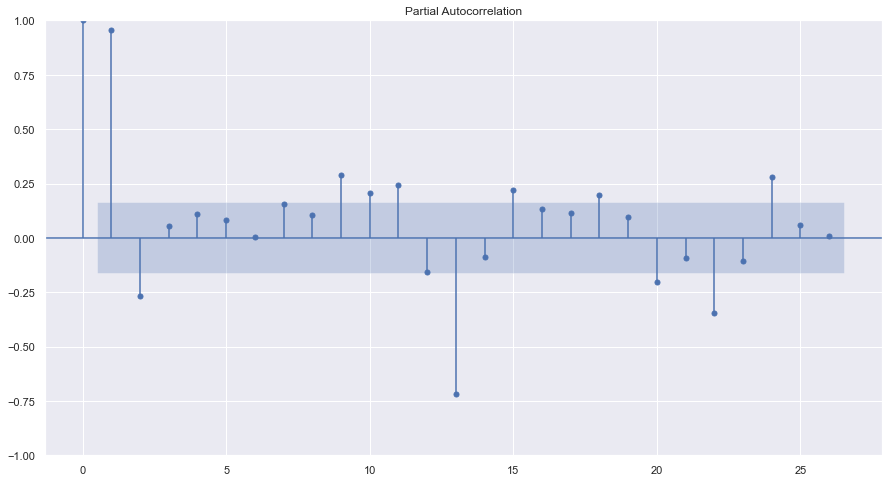

In [10]:
f.plot_pacf(lags=26)
plt.show()

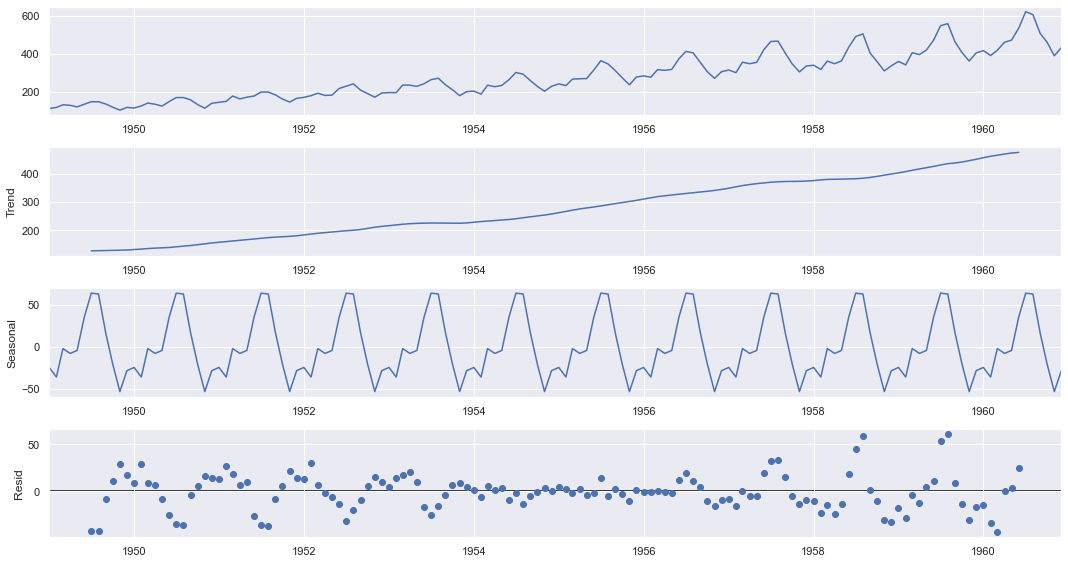

In [11]:
f.seasonal_decompose().plot()
plt.show()

In [12]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat)
print(pval)

0.8153688792060569
0.9918802434376411


## LSTM Model

In [13]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

### Attempt 1

5/5 [==============================] - 4s 4ms/step - loss: 0.3415


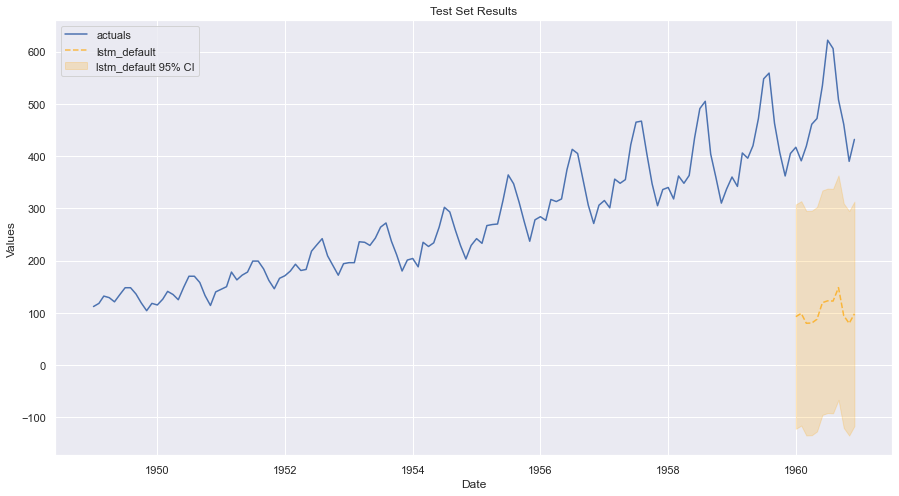

In [14]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

### Attempt 2

4/4 [==============================] - 5s 16ms/step - loss: 0.3785


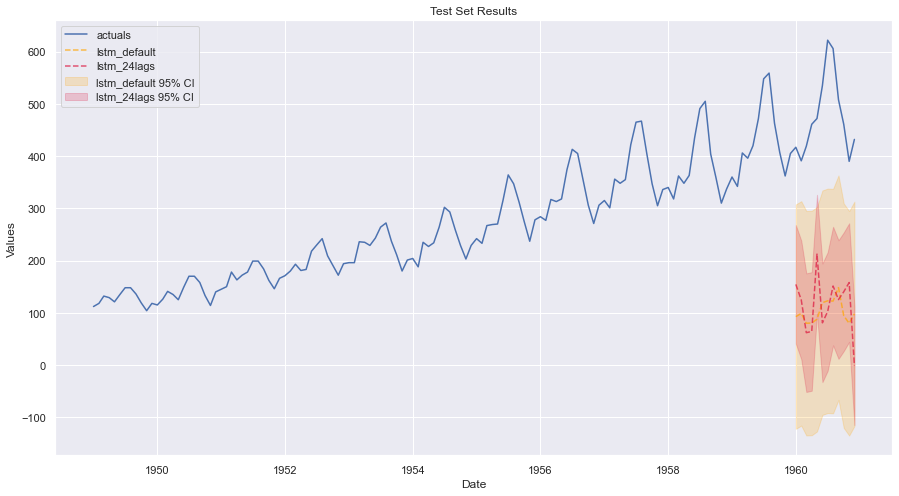

In [15]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

### Attempt 3

Epoch 1/5
3/3 [==============================] - 5s 438ms/step - loss: 0.4691 - val_loss: 0.1937
Epoch 2/5
3/3 [==============================] - 0s 26ms/step - loss: 0.4605 - val_loss: 0.1875
Epoch 3/5
3/3 [==============================] - 0s 25ms/step - loss: 0.4516 - val_loss: 0.1811
Epoch 4/5
3/3 [==============================] - 0s 26ms/step - loss: 0.4424 - val_loss: 0.1744
Epoch 5/5
3/3 [==============================] - 0s 31ms/step - loss: 0.4328 - val_loss: 0.1675
Epoch 1/5
3/3 [==============================] - 3s 367ms/step - loss: 0.4669 - val_loss: 0.1794
Epoch 2/5
3/3 [==============================] - 0s 27ms/step - loss: 0.4595 - val_loss: 0.1742
Epoch 3/5
3/3 [==============================] - 0s 26ms/step - loss: 0.4521 - val_loss: 0.1690
Epoch 4/5
3/3 [==============================] - 0s 28ms/step - loss: 0.4447 - val_loss: 0.1638
Epoch 5/5
3/3 [==============================] - 0s 26ms/step - loss: 0.4373 - val_loss: 0.1585


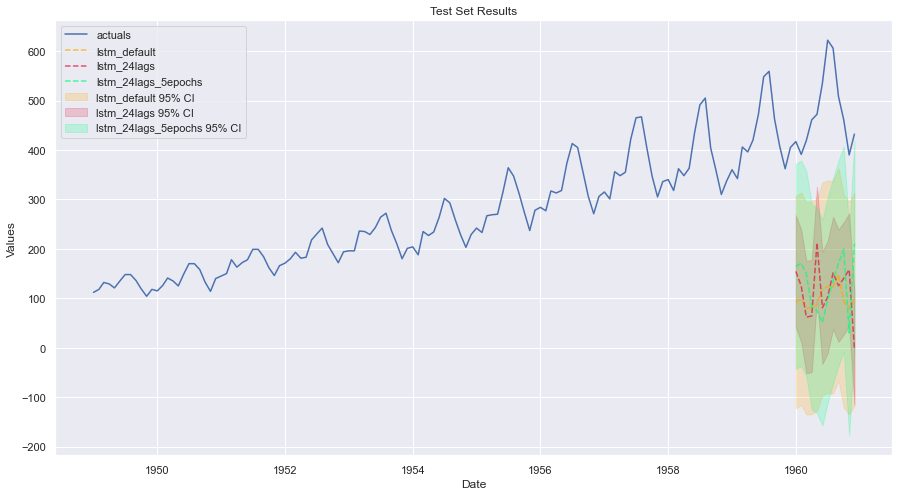

In [16]:
f.manual_forecast(call_me='lstm_24lags_5epochs',lags=24,epochs=5,validation_split=.2,shuffle=True)
f.plot_test_set(ci=True)

### Attempt 4

Epoch 1/25
3/3 [==============================] - 9s 936ms/step - loss: 0.4584 - val_loss: 0.1866
Epoch 2/25
3/3 [==============================] - 0s 45ms/step - loss: 0.4431 - val_loss: 0.1750
Epoch 3/25
3/3 [==============================] - 0s 49ms/step - loss: 0.4241 - val_loss: 0.1596
Epoch 4/25
3/3 [==============================] - 0s 46ms/step - loss: 0.3979 - val_loss: 0.1385
Epoch 5/25
3/3 [==============================] - 0s 49ms/step - loss: 0.3599 - val_loss: 0.1128
Epoch 6/25
3/3 [==============================] - 0s 50ms/step - loss: 0.3085 - val_loss: 0.0898
Epoch 7/25
3/3 [==============================] - 0s 54ms/step - loss: 0.2541 - val_loss: 0.0935
Epoch 8/25
3/3 [==============================] - 0s 45ms/step - loss: 0.2030 - val_loss: 0.1416
Epoch 9/25
3/3 [==============================] - 0s 51ms/step - loss: 0.1799 - val_loss: 0.1958
Epoch 10/25
3/3 [==============================] - 0s 54ms/step - loss: 0.1795 - val_loss: 0.2127
Epoch 11/25
3/3 [===========

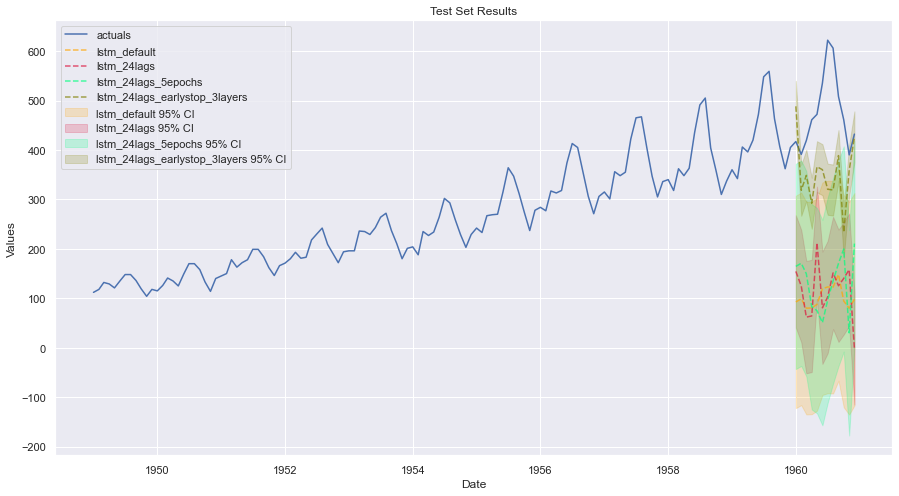

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

### Attempt 5

Epoch 1/15
3/3 [==============================] - 12s 1s/step - loss: 0.4754 - val_loss: 0.1826
Epoch 2/15
3/3 [==============================] - 0s 90ms/step - loss: 0.3227 - val_loss: 0.1347
Epoch 3/15
3/3 [==============================] - 0s 101ms/step - loss: 0.1944 - val_loss: 0.0779
Epoch 4/15
3/3 [==============================] - 0s 96ms/step - loss: 0.1275 - val_loss: 0.0594
Epoch 5/15
3/3 [==============================] - 0s 99ms/step - loss: 0.1213 - val_loss: 0.1023
Epoch 6/15
3/3 [==============================] - 0s 100ms/step - loss: 0.1235 - val_loss: 0.0653
Epoch 7/15
3/3 [==============================] - 0s 102ms/step - loss: 0.0992 - val_loss: 0.0521
Epoch 8/15
3/3 [==============================] - 0s 101ms/step - loss: 0.0997 - val_loss: 0.0571
Epoch 9/15
3/3 [==============================] - 0s 102ms/step - loss: 0.0977 - val_loss: 0.0533
Epoch 10/15
3/3 [==============================] - 0s 100ms/step - loss: 0.0898 - val_loss: 0.0554
Epoch 11/15
3/3 [=======

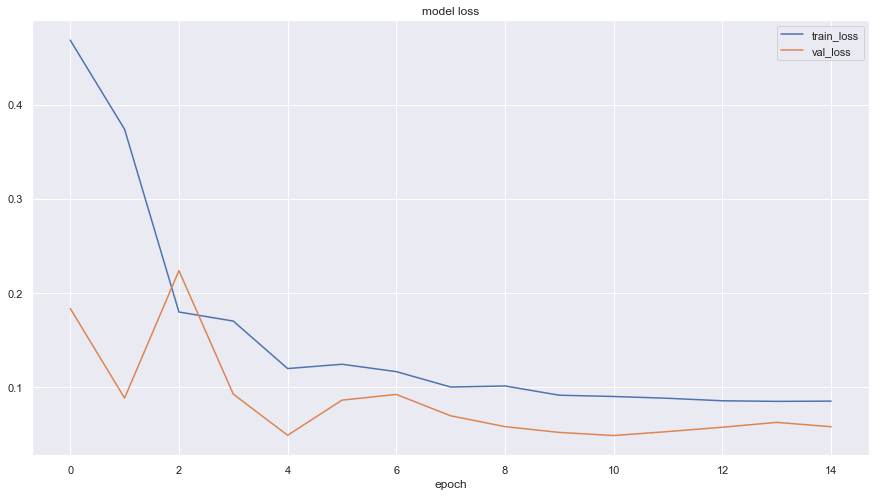

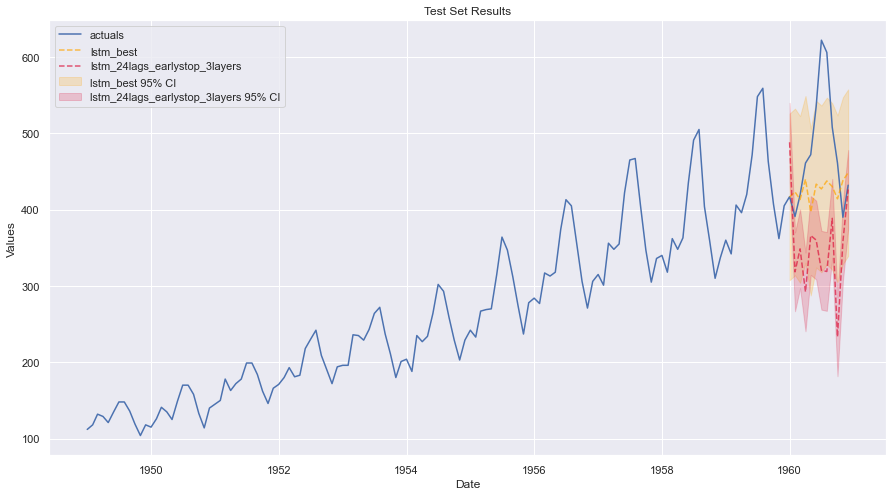

In [18]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

### Attempt 6

Epoch 1/300
5/5 [==============================] - 46s 2s/step - loss: 0.4570 - val_loss: 0.2561
Epoch 2/300
5/5 [==============================] - 2s 456ms/step - loss: 0.1616 - val_loss: 0.1189
Epoch 3/300
5/5 [==============================] - 2s 484ms/step - loss: 0.1643 - val_loss: 0.2315
Epoch 4/300
5/5 [==============================] - 3s 589ms/step - loss: 0.1501 - val_loss: 0.2289
Epoch 5/300
5/5 [==============================] - 2s 500ms/step - loss: 0.1418 - val_loss: 0.2131
Epoch 6/300
5/5 [==============================] - 2s 488ms/step - loss: 0.1338 - val_loss: 0.1899
Epoch 7/300
5/5 [==============================] - 3s 626ms/step - loss: 0.1242 - val_loss: 0.0613
Epoch 8/300
5/5 [==============================] - 3s 655ms/step - loss: 0.0994 - val_loss: 0.0564
Epoch 9/300
5/5 [==============================] - 3s 539ms/step - loss: 0.1033 - val_loss: 0.1526
Epoch 10/300
5/5 [==============================] - 3s 554ms/step - loss: 0.0988 - val_loss: 0.0540
Epoch 11/30

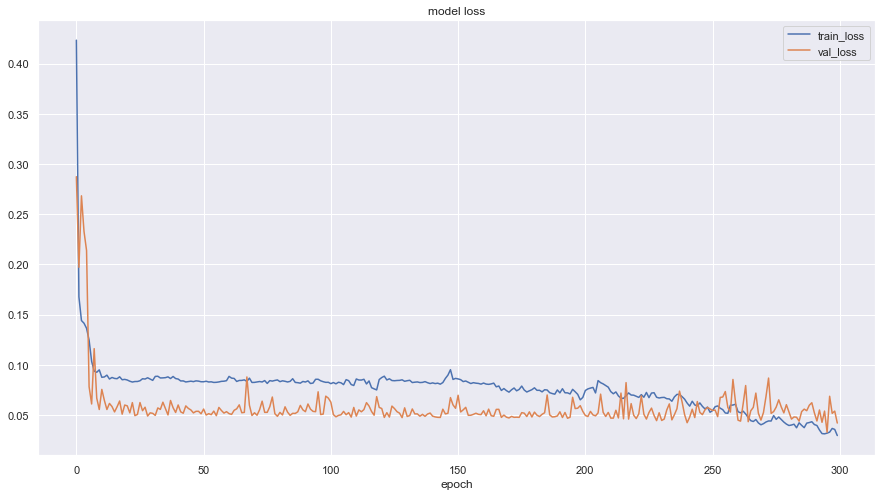

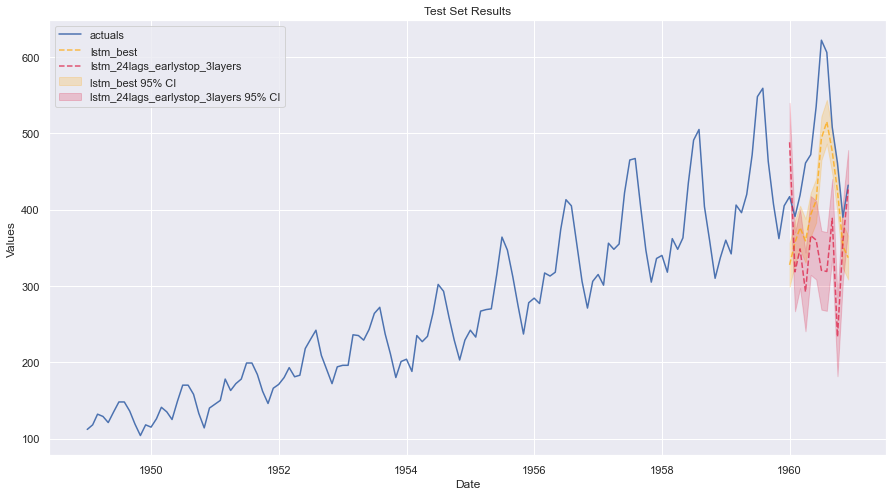

In [19]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=16,
                  epochs=300,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

## MLR Modeling

In [28]:
f.set_estimator('mlr')
f.add_ar_terms(24)
f.add_seasonal_regressors('month','quarter',dummy=True)
f.add_seasonal_regressors('year')
f.add_time_trend()
f.diff()

ForecastError: AR terms must be added before differencing (don't worry, they will be differenced too)

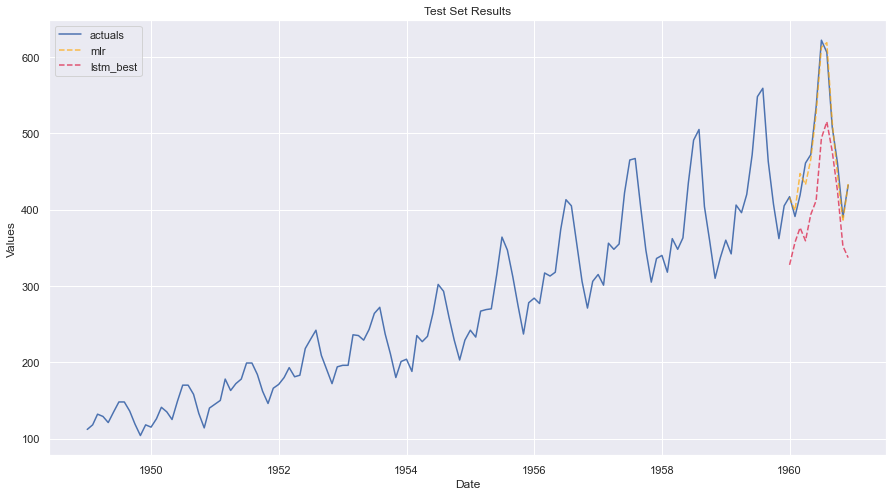

In [21]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')

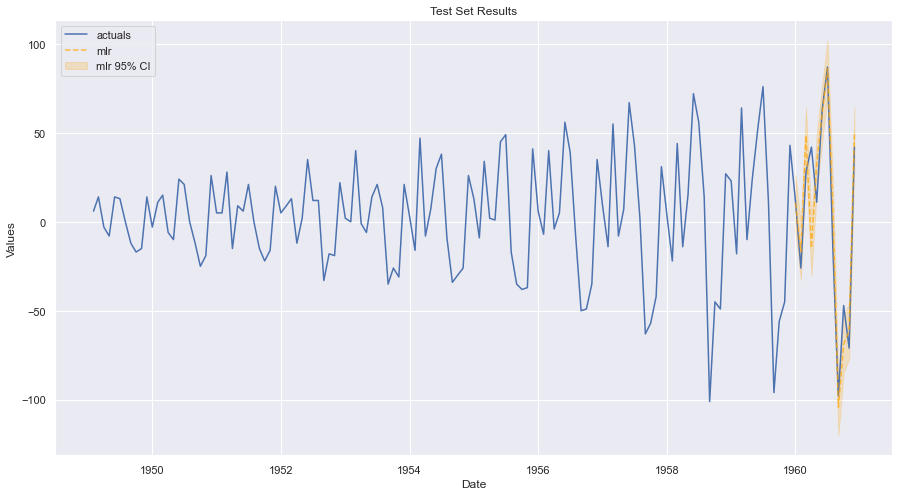

In [22]:
f.plot_test_set(models='mlr',ci=True)

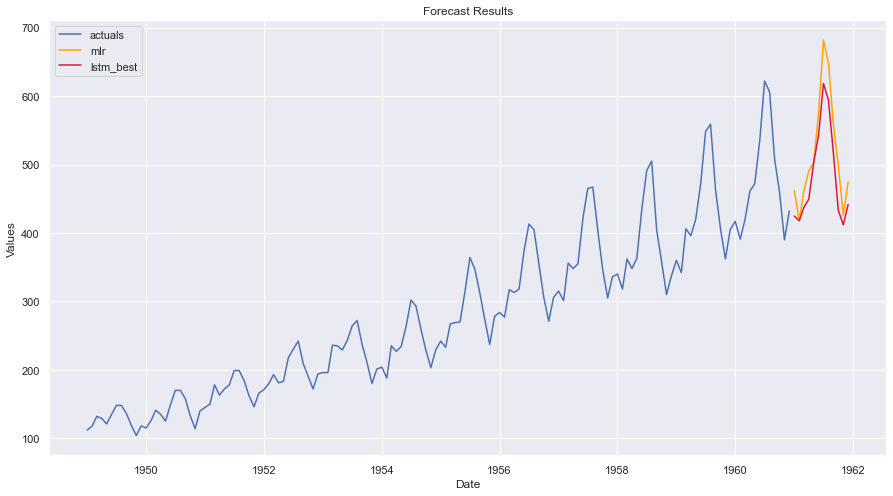

In [23]:
f.plot(order_by='LevelTestSetMAPE',models='top_2')

## Benchmarking

In [24]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname','LevelTestSetMAPE','LevelTestSetRMSE','LevelTestSetR2','best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,mlr,0.023420,13.932124,0.964960,True
1,lstm_best,0.152936,81.749753,-0.206437,False
2,lstm_24lags_earlystop_3layers,0.268600,164.813634,-3.903632,False
3,lstm_24lags_5epochs,0.722274,362.759162,-22.755731,False
4,lstm_24lags,0.754654,372.634588,-24.066745,False
5,lstm_default,0.785267,379.182326,-24.955403,False


## Export Results

In [25]:
f.export_forecasts_with_cis('mlr')

,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,1961-01-01,46.132765,30.246319,14.359872,mlr,0.95
1,1961-02-01,-28.636285,-44.522731,-60.409178,mlr,0.95
2,1961-03-01,59.564386,43.677939,27.791492,mlr,0.95
3,1961-04-01,44.949872,29.063425,13.176979,mlr,0.95
4,1961-05-01,28.283836,12.397390,-3.489057,mlr,0.95
5,1961-06-01,89.146432,73.259985,57.373538,mlr,0.95
6,1961-07-01,121.427272,105.540825,89.654379,mlr,0.95
7,1961-08-01,-17.700697,-33.587144,-49.473591,mlr,0.95
8,1961-09-01,-74.645878,-90.532325,-106.418771,mlr,0.95
9,1961-10-01,-43.486351,-59.372797,-75.259244,mlr,0.95


In [26]:
f.export_test_set_preds_with_cis('mlr')

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,1960-01-01,26.488157,10.601711,12.0,-5.284736,mlr,0.95
1,1960-02-01,-0.836650,-16.723097,-26.0,-32.609543,mlr,0.95
2,1960-03-01,64.308417,48.421971,28.0,32.535524,mlr,0.95
3,1960-04-01,1.320236,-14.566210,42.0,-30.452657,mlr,0.95
4,1960-05-01,48.770391,32.883945,11.0,16.997498,mlr,0.95
5,1960-06-01,76.784476,60.898029,63.0,45.011583,mlr,0.95
6,1960-07-01,102.091096,86.204650,87.0,70.318203,mlr,0.95
7,1960-08-01,21.891642,6.005196,-16.0,-9.881251,mlr,0.95
8,1960-09-01,-88.359025,-104.245472,-98.0,-120.131918,mlr,0.95
9,1960-10-01,-52.734624,-68.621071,-47.0,-84.507517,mlr,0.95


### Export Feature Info

In [27]:
f.save_feature_importance()
f.export_feature_importance('mlr')

,weight,std
feature,,
AR1,0.375280,0.047093
AR12,0.208594,0.014568
AR4,0.206300,0.031109
AR10,0.173246,0.022364
AR21,0.126095,0.014291
AR13,0.119273,0.005985
AR18,0.117968,0.012254
AR2,0.112791,0.006676
AR11,0.088403,0.007659
